# Import Library

In [ ]:
%pip install category_encoders
%pip install scikit-optimize

%pip install lightgbm
%pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Gathering Data

In [ ]:
df = pd.read_csv('/content/df_cleaned.csv')

# Pre-Processing Data

Binary Embedding

In [ ]:
# Membuat salinan DataFrame untuk menyimpan hasil encoding
df_copy = df.copy()

# Inisialisasi Binary Encoder
# cols=['city'] menentukan kolom mana yang akan di-encode
encoder = ce.BinaryEncoder(cols=['city'])

# Melakukan encoding pada kolom 'city'
df_new = encoder.fit_transform(df_copy)

# Menampilkan beberapa baris pertama dari DataFrame setelah encoding
print("\nDataFrame setelah Binary Encoding pada kolom 'city':")
display(df_new.head())


DataFrame setelah Binary Encoding pada kolom 'city':


,price_numeric,kamar tidur,kamar mandi,luas tanah,luas bangunan,kolam_renang,rumah_sakit_klinik,tol,sekolah,restoran_kuliner,...,transportasi,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,5.000000e+09,4.0,4.0,190.0,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.000000e+09,3.0,3.0,240.0,200.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4.500000e+09,4.0,3.0,140.0,250.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4.800000e+09,3.0,3.0,150.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.700000e+09,4.0,3.0,135.0,189.0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1


## Tabel dengan price dibawah 10 Miliar dan ada fasilitas

In [ ]:
# Memisahkan fitur (X) dan target (Y)
X = df_new.drop('price_numeric', axis=1) # X adalah semua kolom kecuali 'price_numeric'
y = df_new['price_numeric'] # y adalah kolom 'price_numeric'

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada fitur X
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame (opsional, tapi berguna untuk melihat hasil)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("\nShape of X_scaled:", X_scaled.shape)
print("\nFitur setelah Standarisasi (beberapa baris pertama):")
display(X_scaled_df.head())

# Melakukan train-test split
# test_size=0.20 artinya 20% data akan menjadi data uji, 80% data latih
# random_state=42 adalah seed untuk memastikan hasil split konsisten setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.20, random_state=42)


Shape of X: (17365, 20)
Shape of y: (17365,)

Shape of X_scaled: (17365, 20)

Fitur setelah Standarisasi (beberapa baris pertama):


,kamar tidur,kamar mandi,luas tanah,luas bangunan,kolam_renang,rumah_sakit_klinik,tol,sekolah,restoran_kuliner,pusat_perbelanjaan,transportasi,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0.714261,1.554231,0.850571,1.473088,-0.166972,-0.193865,-0.217882,-0.532929,-0.119875,-0.475572,-0.619585,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,-0.922755,0.958975
1,-0.494269,0.323925,1.598359,0.291774,-0.166972,-0.193865,-0.217882,1.876422,-0.119875,-0.475572,-0.619585,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,1.083711,-1.042780
2,0.714261,0.323925,0.102783,0.882431,-0.166972,-0.193865,-0.217882,-0.532929,-0.119875,-0.475572,-0.619585,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,1.083711,0.958975
3,-0.494269,0.323925,0.252340,0.291774,-0.166972,-0.193865,-0.217882,-0.532929,-0.119875,-0.475572,-0.619585,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,1.089761,-0.922755,-1.042780
4,0.714261,0.323925,0.028004,0.161830,-0.166972,5.158228,4.589641,-0.532929,8.342028,-0.475572,-0.619585,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,1.089761,-0.922755,0.958975


## Tabel dengan price dibawah 10 Miliar dan tidak ada fasilitas

In [ ]:
columns_to_drop_no_facility = [
    'kolam_renang',
    'rumah_sakit_klinik',
    'tol',
    'sekolah',
    'restoran_kuliner',
    'pusat_perbelanjaan',
    'transportasi'
]

# Buat df_new2 dengan menghilangkan kolom-kolom fasilitas dari df_new
df_new2 = df_new.drop(columns=columns_to_drop_no_facility, errors='ignore')

# Menampilkan beberapa baris pertama dari df_new2
print("\nDataFrame df_new2 tanpa kolom fasilitas:")
display(df_new2.head())


DataFrame df_new2 tanpa kolom fasilitas:


,price_numeric,kamar tidur,kamar mandi,luas tanah,luas bangunan,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,5.000000e+09,4.0,4.0,190.0,300.0,0,0,0,0,0,0,0,0,1
1,5.000000e+09,3.0,3.0,240.0,200.0,0,0,0,0,0,0,0,1,0
2,4.500000e+09,4.0,3.0,140.0,250.0,0,0,0,0,0,0,0,1,1
3,4.800000e+09,3.0,3.0,150.0,200.0,0,0,0,0,0,0,1,0,0
4,3.700000e+09,4.0,3.0,135.0,189.0,0,0,0,0,0,0,1,0,1


In [ ]:
# Memisahkan fitur (X) dan target (Y) untuk df_new2
X2 = df_new2.drop('price_numeric', axis=1) # X2 adalah semua kolom kecuali 'price_numeric'
y2 = df_new2['price_numeric'] # y2 adalah kolom 'price_numeric'

print("\nShape of X2:", X2.shape)
print("Shape of y2:", y2.shape)

# Inisialisasi StandardScaler
scaler2 = StandardScaler()

# Melakukan standarisasi pada fitur X2
X_scaled2 = scaler2.fit_transform(X2)

# Konversi kembali ke DataFrame (opsional)
X_scaled_df2 = pd.DataFrame(X_scaled2, columns=X2.columns, index=X2.index)

print("\nShape of X_scaled2:", X_scaled2.shape)
print("\nFitur setelah Standarisasi (df_new2, beberapa baris pertama):")
display(X_scaled_df2.head())

# Melakukan train-test split untuk data tanpa fasilitas
# test_size=0.20 artinya 20% data akan menjadi data uji, 80% data latih
# random_state=42 adalah seed untuk memastikan hasil split konsisten
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled_df2, y2, test_size=0.20, random_state=42)

print("\nShape of X_train2:", X_train2.shape)
print("Shape of X_test2:", X_test2.shape)
print("Shape of y_train2:", y_train2.shape)
print("Shape of y_test2:", y_test2.shape)


Shape of X2: (17365, 13)
Shape of y2: (17365,)

Shape of X_scaled2: (17365, 13)

Fitur setelah Standarisasi (df_new2, beberapa baris pertama):


,kamar tidur,kamar mandi,luas tanah,luas bangunan,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0.714261,1.554231,0.850571,1.473088,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,-0.922755,0.958975
1,-0.494269,0.323925,1.598359,0.291774,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,1.083711,-1.042780
2,0.714261,0.323925,0.102783,0.882431,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,-0.917633,1.083711,0.958975
3,-0.494269,0.323925,0.252340,0.291774,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,1.089761,-0.922755,-1.042780
4,0.714261,0.323925,0.028004,0.161830,-0.041601,-0.82949,-0.897061,-0.834842,-0.82949,-0.829292,1.089761,-0.922755,0.958975



Shape of X_train2: (13892, 13)
Shape of X_test2: (3473, 13)
Shape of y_train2: (13892,)
Shape of y_test2: (3473,)


## Tabel dengan price dibawah 5 Miliar dan ada fasilitas

In [ ]:
# Batas harga 5 miliar
threshold_price_5_billion = 5_000_000_000

# Buat DataFrame baru df_new3 dari df_new
# Filter baris di mana 'price_numeric' kurang dari atau sama dengan 5 miliar
df_new3 = df_new[df_new['price_numeric'] <= threshold_price_5_billion].copy()

print(f"\nJumlah baris di df_new3 setelah memfilter harga <= 5 miliar: {df_new3.shape[0]}")
display(df_new3.head())


Jumlah baris di df_new3 setelah memfilter harga <= 5 miliar: 14049


,price_numeric,kamar tidur,kamar mandi,luas tanah,luas bangunan,kolam_renang,rumah_sakit_klinik,tol,sekolah,restoran_kuliner,...,transportasi,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,5.000000e+09,4.0,4.0,190.0,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.000000e+09,3.0,3.0,240.0,200.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4.500000e+09,4.0,3.0,140.0,250.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,4.800000e+09,3.0,3.0,150.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.700000e+09,4.0,3.0,135.0,189.0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# Memisahkan fitur (X) dan target (Y) untuk df_new3
X3 = df_new3.drop('price_numeric', axis=1) # X3 adalah semua kolom kecuali 'price_numeric'
y3 = df_new3['price_numeric'] # y3 adalah kolom 'price_numeric'

print("\nShape of X3:", X3.shape)
print("Shape of y3:", y3.shape)

# Inisialisasi StandardScaler
scaler3 = StandardScaler()

# Melakukan standarisasi pada fitur X3
X_scaled3 = scaler3.fit_transform(X3)

# Konversi kembali ke DataFrame (opsional)
X_scaled_df3 = pd.DataFrame(X_scaled3, columns=X3.columns, index=X3.index)

print("\nShape of X_scaled3:", X_scaled3.shape)
print("\nFitur setelah Standarisasi (df_new3, beberapa baris pertama):")
display(X_scaled_df3.head())

# Melakukan train-test split untuk data dengan harga <= 5 miliar
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled_df3, y3, test_size=0.20, random_state=42)

print("\nShape of X_train3:", X_train3.shape)
print("Shape of X_test3:", X_test3.shape)
print("Shape of y_train3:", y_train3.shape)
print("Shape of y_test3:", y_test3.shape)


Shape of X3: (14049, 20)
Shape of y3: (14049,)

Shape of X_scaled3: (14049, 20)

Fitur setelah Standarisasi (df_new3, beberapa baris pertama):


,kamar tidur,kamar mandi,luas tanah,luas bangunan,kolam_renang,rumah_sakit_klinik,tol,sekolah,restoran_kuliner,pusat_perbelanjaan,transportasi,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0.841458,1.693078,1.341711,2.085352,-0.144924,-0.205264,-0.226574,-0.533642,-0.122289,-0.487757,-0.647594,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,-0.901021,0.958782
1,-0.377268,0.451051,2.243915,0.664600,-0.144924,-0.205264,-0.226574,1.873916,-0.122289,-0.487757,-0.647594,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,1.109852,-1.042990
2,0.841458,0.451051,0.439507,1.374976,-0.144924,-0.205264,-0.226574,-0.533642,-0.122289,-0.487757,-0.647594,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,1.109852,0.958782
3,-0.377268,0.451051,0.619948,0.664600,-0.144924,-0.205264,-0.226574,-0.533642,-0.122289,-0.487757,-0.647594,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,1.078602,-0.901021,-1.042990
4,0.841458,0.451051,0.349286,0.508317,-0.144924,4.871771,4.413569,-0.533642,8.177381,-0.487757,-0.647594,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,1.078602,-0.901021,0.958782



Shape of X_train3: (11239, 20)
Shape of X_test3: (2810, 20)
Shape of y_train3: (11239,)
Shape of y_test3: (2810,)


## Tabel dengan price dibawah 5 Miliar dan tidak ada fasilitas

In [ ]:
# Batas harga 5 miliar
threshold_price_5_billion = 5_000_000_000

# Buat DataFrame baru df_new4 dari df_new2
# Filter baris di mana 'price_numeric' kurang dari atau sama dengan 5 miliar
df_new4 = df_new2[df_new2['price_numeric'] <= threshold_price_5_billion].copy()

print(f"\nJumlah baris di df_new4 setelah memfilter harga <= 5 miliar: {df_new4.shape[0]}")
display(df_new4.head())


Jumlah baris di df_new4 setelah memfilter harga <= 5 miliar: 14049


,price_numeric,kamar tidur,kamar mandi,luas tanah,luas bangunan,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,5.000000e+09,4.0,4.0,190.0,300.0,0,0,0,0,0,0,0,0,1
1,5.000000e+09,3.0,3.0,240.0,200.0,0,0,0,0,0,0,0,1,0
2,4.500000e+09,4.0,3.0,140.0,250.0,0,0,0,0,0,0,0,1,1
3,4.800000e+09,3.0,3.0,150.0,200.0,0,0,0,0,0,0,1,0,0
4,3.700000e+09,4.0,3.0,135.0,189.0,0,0,0,0,0,0,1,0,1


In [ ]:
# Memisahkan fitur (X) dan target (Y) untuk df_new4
X4 = df_new4.drop('price_numeric', axis=1) # X4 adalah semua kolom kecuali 'price_numeric'
y4 = df_new4['price_numeric'] # y4 adalah kolom 'price_numeric'

print("\nShape of X4:", X4.shape)
print("Shape of y4:", y4.shape)

# Inisialisasi StandardScaler
scaler4 = StandardScaler()

# Melakukan standarisasi pada fitur X4
X_scaled4 = scaler4.fit_transform(X4)

# Konversi kembali ke DataFrame (opsional)
X_scaled_df4 = pd.DataFrame(X_scaled4, columns=X4.columns, index=X4.index)

print("\nShape of X_scaled4:", X_scaled4.shape)
print("\nFitur setelah Standarisasi (df_new4, beberapa baris pertama):")
display(X_scaled_df4.head())

# Melakukan train-test split untuk data tanpa fasilitas dan harga <= 5 miliar
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_scaled_df4, y4, test_size=0.20, random_state=42)

print("\nShape of X_train4:", X_train4.shape)
print("Shape of X_test4:", X_test4.shape)
print("Shape of y_train4:", y_train4.shape)
print("Shape of y_test4:", y_test4.shape)


Shape of X4: (14049, 13)
Shape of y4: (14049,)

Shape of X_scaled4: (14049, 13)

Fitur setelah Standarisasi (df_new4, beberapa baris pertama):


,kamar tidur,kamar mandi,luas tanah,luas bangunan,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0.841458,1.693078,1.341711,2.085352,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,-0.901021,0.958782
1,-0.377268,0.451051,2.243915,0.664600,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,1.109852,-1.042990
2,0.841458,0.451051,0.439507,1.374976,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,1.109852,0.958782
3,-0.377268,0.451051,0.619948,0.664600,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,1.078602,-0.901021,-1.042990
4,0.841458,0.451051,0.349286,0.508317,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,1.078602,-0.901021,0.958782



Shape of X_train4: (11239, 13)
Shape of X_test4: (2810, 13)
Shape of y_train4: (11239,)
Shape of y_test4: (2810,)


# Model

### df_new

Random Forest

In [ ]:
# Inisialisasi model Random Forest Regressor
# n_estimators=100 adalah jumlah pohon dalam forest
# random_state=42 untuk hasil yang konsisten
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model menggunakan data latih
model_rf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# # Evaluasi Model Random Forest

# Menghitung metrik evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Evaluasi Model Random Forest")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Evaluasi Model Random Forest
Mean Absolute Error (MAE): 595466381.29
Mean Squared Error (MSE): 881557387842535040.00
Root Mean Squared Error (RMSE): 938912875.53
R-squared (R2): 0.79


Gradien Boosting

In [ ]:

# Inisialisasi model Gradient Boosting Regressor
# Sesuaikan parameter seperti n_estimators, learning_rate, max_depth sesuai kebutuhan
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model menggunakan data latih
print("\nMelatih model Gradient Boosting...")
model_gb.fit(X_train, y_train)
print("Model Gradient Boosting selesai dilatih.")

# Melakukan prediksi pada data uji
y_pred_gb = model_gb.predict(X_test)

# # Evaluasi Model Gradient Boosting

# Menghitung metrik evaluasi
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Gradient Boosting")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2): {r2_gb:.2f}")



Melatih model Gradient Boosting...
Model Gradient Boosting selesai dilatih.

Evaluasi Model Gradient Boosting
Mean Absolute Error (MAE): 782830752.59
Mean Squared Error (MSE): 1228076654442879744.00
Root Mean Squared Error (RMSE): 1108186200.26
R-squared (R2): 0.70


XGBoost

In [ ]:
# Inisialisasi model XGBoost Regressor
# Sesuaikan parameter seperti n_estimators, learning_rate, max_depth sesuai kebutuhan
model_xgb = XGBRegressor(objective='reg:squarederror', # objective untuk regresi
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5, # Umumnya sedikit lebih dalam dari GB
                         random_state=42,
                         n_jobs=-1) # Menggunakan semua core CPU yang tersedia

model_xgb.fit(X_train, y_train) # Fit the model using the training data

# Melakukan prediksi pada data uji
y_pred_xgb = model_xgb.predict(X_test)

# # Evaluasi Model XGBoost

# Menghitung metrik evaluasi
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model XGBoost")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")


Evaluasi Model XGBoost
Mean Absolute Error (MAE): 720046192.10
Mean Squared Error (MSE): 1080085439350329344.00
Root Mean Squared Error (RMSE): 1039271590.75
R-squared (R2): 0.74


### df_new2

In [ ]:
# Random Forest for df_new2 (data without facilities)
# Inisialisasi model Random Forest Regressor
# n_estimators=100 adalah jumlah pohon dalam forest
# random_state=42 untuk hasil yang konsisten
model_rf2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model menggunakan data latih dari df_new2
model_rf2.fit(X_train2, y_train2)

# Melakukan prediksi pada data uji dari df_new2
y_pred_rf2 = model_rf2.predict(X_test2)

# # Evaluasi Model Random Forest untuk df_new2

# Menghitung metrik evaluasi
mae_rf2 = mean_absolute_error(y_test2, y_pred_rf2)
mse_rf2 = mean_squared_error(y_test2, y_pred_rf2)
rmse_rf2 = np.sqrt(mse_rf2)
r2_rf2 = r2_score(y_test2, y_pred_rf2)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest (df_new2)")
print(f"Mean Absolute Error (MAE): {mae_rf2:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf2:.2f}")
print(f"R-squared (R2): {r2_rf2:.2f}")


Evaluasi Model Random Forest (df_new2)
Mean Absolute Error (MAE): 602889337.30
Mean Squared Error (MSE): 908370454381441408.00
Root Mean Squared Error (RMSE): 953084704.73
R-squared (R2): 0.78


In [ ]:
# Gradien Boosting for df_new2 (data without facilities)

# Inisialisasi model Gradient Boosting Regressor
# Sesuaikan parameter seperti n_estimators, learning_rate, max_depth sesuai kebutuhan
model_gb2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model menggunakan data latih dari df_new2
model_gb2.fit(X_train2, y_train2)

# Melakukan prediksi pada data uji dari df_new2
y_pred_gb2 = model_gb2.predict(X_test2)

# # Evaluasi Model Gradient Boosting untuk df_new2

# Menghitung metrik evaluasi
mae_gb2 = mean_absolute_error(y_test2, y_pred_gb2)
mse_gb2 = mean_squared_error(y_test2, y_pred_gb2)
rmse_gb2 = np.sqrt(mse_gb2)
r2_gb2 = r2_score(y_test2, y_pred_gb2)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Gradient Boosting (df_new2)")
print(f"Mean Absolute Error (MAE): {mae_gb2:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb2:.2f}")
print(f"R-squared (R2): {r2_gb2:.2f}")


Evaluasi Model Gradient Boosting (df_new2)
Mean Absolute Error (MAE): 801342480.32
Mean Squared Error (MSE): 1272766591265847552.00
Root Mean Squared Error (RMSE): 1128169575.58
R-squared (R2): 0.69


In [ ]:
# XGBoost for df_new2 (data without facilities)
# Inisialisasi model XGBoost Regressor
model_xgb2 = XGBRegressor(objective='reg:squarederror',
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=5,
                          random_state=42,
                          n_jobs=-1)

# Melatih model menggunakan data latih dari df_new2
model_xgb2.fit(X_train2, y_train2)

# Melakukan prediksi pada data uji dari df_new2
y_pred_xgb2 = model_xgb2.predict(X_test2)

# # Evaluasi Model XGBoost untuk df_new2

# Menghitung metrik evaluasi
mae_xgb2 = mean_absolute_error(y_test2, y_pred_xgb2)
mse_xgb2 = mean_squared_error(y_test2, y_pred_xgb2)
rmse_xgb2 = np.sqrt(mse_xgb2)
r2_xgb2 = r2_score(y_test2, y_pred_xgb2)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model XGBoost (df_new2)")
print(f"Mean Absolute Error (MAE): {mae_xgb2:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb2:.2f}")
print(f"R-squared (R2): {r2_xgb2:.2f}")



Evaluasi Model XGBoost (df_new2)
Mean Absolute Error (MAE): 714919069.13
Mean Squared Error (MSE): 1059398121821007616.00
Root Mean Squared Error (RMSE): 1029270674.71
R-squared (R2): 0.74


### df_new3

Random Forest

In [ ]:
# Random Forest for df_new3 (price <= 5 Billion, with facilities)
# Inisialisasi model Random Forest Regressor
model_rf3 = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model menggunakan data latih dari df_new3
model_rf3.fit(X_train3, y_train3)

# Melakukan prediksi pada data uji dari df_new3
y_pred_rf3 = model_rf3.predict(X_test3)

# # Evaluasi Model Random Forest untuk df_new3

# Menghitung metrik evaluasi
mae_rf3 = mean_absolute_error(y_test3, y_pred_rf3)
mse_rf3 = mean_squared_error(y_test3, y_pred_rf3)
rmse_rf3 = np.sqrt(mse_rf3)
r2_rf3 = r2_score(y_test3, y_pred_rf3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_rf3:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf3:.2f}")
print(f"R-squared (R2): {r2_rf3:.2f}")


Evaluasi Model Random Forest (df_new3)
Mean Absolute Error (MAE): 391409387.37
Mean Squared Error (MSE): 324340244666631296.00
Root Mean Squared Error (RMSE): 569508774.88
R-squared (R2): 0.75


Gradient Boosting

In [ ]:
# Gradient Boosting for df_new3 (price <= 5 Billion, with facilities)

# Inisialisasi model Gradient Boosting Regressor
# Sesuaikan parameter seperti n_estimators, learning_rate, max_depth sesuai kebutuhan
model_gb3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model menggunakan data latih dari df_new3
model_gb3.fit(X_train3, y_train3)


# Melakukan prediksi pada data uji dari df_new3
y_pred_gb3 = model_gb3.predict(X_test3)

# # Evaluasi Model Gradient Boosting untuk df_new3

# Menghitung metrik evaluasi
mae_gb3 = mean_absolute_error(y_test3, y_pred_gb3)
mse_gb3 = mean_squared_error(y_test3, y_pred_gb3)
rmse_gb3 = np.sqrt(mse_gb3)
r2_gb3 = r2_score(y_test3, y_pred_gb3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Gradient Boosting (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_gb3:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb3:.2f}")
print(f"R-squared (R2): {r2_gb3:.2f}")


Evaluasi Model Gradient Boosting (df_new3)
Mean Absolute Error (MAE): 501460231.47
Mean Squared Error (MSE): 432390668185642304.00
Root Mean Squared Error (RMSE): 657564193.21
R-squared (R2): 0.66


XGBoost

In [ ]:
# XGBoost for df_new3 (price <= 5 Billion, with facilities)
# Inisialisasi model XGBoost Regressor
model_xgb3 = XGBRegressor(objective='reg:squarederror',
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=5,
                          random_state=42,
                          n_jobs=-1)

# Melatih model menggunakan data latih dari df_new3
model_xgb3.fit(X_train3, y_train3)

# Melakukan prediksi pada data uji dari df_new3
y_pred_xgb3 = model_xgb3.predict(X_test3)

# # Evaluasi Model XGBoost untuk df_new3

# Menghitung metrik evaluasi
mae_xgb3 = mean_absolute_error(y_test3, y_pred_xgb3)
mse_xgb3 = mean_squared_error(y_test3, y_pred_xgb3)
rmse_xgb3 = np.sqrt(mse_xgb3)
r2_xgb3 = r2_score(y_test3, y_pred_xgb3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model XGBoost (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_xgb3:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb3:.2f}")
print(f"R-squared (R2): {r2_xgb3:.2f}")


Evaluasi Model XGBoost (df_new3)
Mean Absolute Error (MAE): 458480827.35
Mean Squared Error (MSE): 378187333094133760.00
Root Mean Squared Error (RMSE): 614969375.74
R-squared (R2): 0.70


SVR

In [ ]:
# Support Vector Regressor (SVR) for df_new3 (price <= 5 Billion, with facilities)

# Inisialisasi model SVR
# Pilih kernel (linear, poly, rbf, sigmoid), C, dan epsilon
# C: Parameter regularisasi. Kekuatan regularisasi berbanding terbalik dengan C.
# epsilon: Epsilon-tube dalam SVR. Area di mana tidak ada penalti diterapkan.
model_svr3 = SVR(kernel='rbf', C=10000000000, epsilon=1000000) # Adjust C and epsilon based on your data scale

# Melatih model menggunakan data latih dari df_new3
print("\nMelatih model SVR (df_new3)...")
model_svr3.fit(X_train3, y_train3)
print("Model SVR (df_new3) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new3
y_pred_svr3 = model_svr3.predict(X_test3)

# # Evaluasi Model SVR untuk df_new3

# Menghitung metrik evaluasi
mae_svr3 = mean_absolute_error(y_test3, y_pred_svr3)
mse_svr3 = mean_squared_error(y_test3, y_pred_svr3)
rmse_svr3 = np.sqrt(mse_svr3)
r2_svr3 = r2_score(y_test3, y_pred_svr3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model SVR (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_svr3:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr3:.2f}")
print(f"R-squared (R2): {r2_svr3:.2f}")



Melatih model SVR (df_new3)...
Model SVR (df_new3) selesai dilatih.

Evaluasi Model SVR (df_new3)
Mean Absolute Error (MAE): 434501322.98
Mean Squared Error (MSE): 370512989622883136.00
Root Mean Squared Error (RMSE): 608697781.84
R-squared (R2): 0.71


In [ ]:
# CatBoost for df_new3 (price <= 5 Billion, with facilities)

# Inisialisasi model CatBoost Regressor
# verbose=0: matikan output pelatihan
model_cb3 = CatBoostRegressor(objective='RMSE',
                              iterations=1000,
                              learning_rate=0.05,
                              depth=6,
                              random_state=42,
                              verbose=0) # Set verbose to 0 to suppress training output

# Melatih model menggunakan data latih dari df_new3
print("\nMelatih model CatBoost (df_new3)...")
model_cb3.fit(X_train3, y_train3)
print("Model CatBoost (df_new3) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new3
y_pred_cb3 = model_cb3.predict(X_test3)

# # Evaluasi Model CatBoost untuk df_new3

# Menghitung metrik evaluasi
mae_cb3 = mean_absolute_error(y_test3, y_pred_cb3)
mse_cb3 = mean_squared_error(y_test3, y_pred_cb3)
rmse_cb3 = np.sqrt(mse_cb3)
r2_cb3 = r2_score(y_test3, y_pred_cb3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model CatBoost (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_cb3:.2f}")
print(f"Mean Squared Error (MSE): {mse_cb3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cb3:.2f}")
print(f"R-squared (R2): {r2_cb3:.2f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00

Melatih model CatBoost (df_new3)...
Model CatBoost (df_new3) selesai dilatih.

Evaluasi Model CatBoost (df_new3)
Mean Absolute Error (MAE): 431741552.19
Mean Squared Error (MSE): 338695151628734784.00
Root Mean Squared Error (RMSE): 581975215.65
R-squared (R2): 0.73


In [ ]:
# LightGBM for df_new3 (price <= 5 Billion, with facilities)

# Inisialisasi model LightGBM Regressor
# objective='regression' untuk regresi
# n_estimators: jumlah boosting rounds
# learning_rate: laju pembelajaran
# num_leaves: jumlah daun maksimal per pohon (parameter utama LightGBM)
# max_depth: kedalaman maksimal pohon (-1 berarti tidak ada batasan)
# random_state: seed untuk hasil yang konsisten
model_lgbm3 = lgb.LGBMRegressor(objective='regression',
                                n_estimators=1000, # Sesuaikan jumlah iterasi
                                learning_rate=0.05, # Sesuaikan laju pembelajaran
                                num_leaves=31, # Sesuaikan jumlah daun
                                max_depth=-1, # Tidak ada batasan kedalaman
                                random_state=42,
                                n_jobs=-1) # Menggunakan semua core CPU yang tersedia

# Melatih model menggunakan data latih dari df_new3
print("\nMelatih model LightGBM (df_new3)...")
# Gunakan early stopping jika ingin mencegah overfitting
# model_lgbm3.fit(X_train3, y_train3,
#                 eval_set=[(X_test3, y_test3)],
#                 eval_metric='rmse',
#                 callbacks=[lgb.early_stopping(10, verbose=False)]) # Contoh early stopping
model_lgbm3.fit(X_train3, y_train3) # Melatih tanpa early stopping

print("Model LightGBM (df_new3) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new3
y_pred_lgbm3 = model_lgbm3.predict(X_test3)

# # Evaluasi Model LightGBM untuk df_new3

# Menghitung metrik evaluasi
mae_lgbm3 = mean_absolute_error(y_test3, y_pred_lgbm3)
mse_lgbm3 = mean_squared_error(y_test3, y_pred_lgbm3)
rmse_lgbm3 = np.sqrt(mse_lgbm3)
r2_lgbm3 = r2_score(y_test3, y_pred_lgbm3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LightGBM (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_lgbm3:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm3:.2f}")
print(f"R-squared (R2): {r2_lgbm3:.2f}")


Melatih model LightGBM (df_new3)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.189451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 11239, number of used features: 20
[LightGBM] [Info] Start training from score 2603064639.698194
Model LightGBM (df_new3) selesai dilatih.

Evaluasi Model LightGBM (df_new3)
Mean Absolute Error (MAE): 405830027.85
Mean Squared Error (MSE): 313736730601030592.00
Root Mean Squared Error (RMSE): 560122067.59
R-squared (R2): 0.75


In [ ]:
# Adaboost for df_new3 (price <= 5 Billion, with facilities)
from sklearn.ensemble import AdaBoostRegressor

# Inisialisasi model AdaBoost Regressor
# base_estimator: model dasar (default adalah DecisionTreeRegressor)
# n_estimators: jumlah estimator dalam ensemble
# learning_rate: laju pembelajaran
# random_state: seed untuk hasil yang konsisten
model_ada3 = AdaBoostRegressor(n_estimators=100,
                               learning_rate=1.0, # Default learning rate is 1.0
                               random_state=42)

# Melatih model menggunakan data latih dari df_new3
print("\nMelatih model AdaBoost (df_new3)...")
model_ada3.fit(X_train3, y_train3)
print("Model AdaBoost (df_new3) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new3
y_pred_ada3 = model_ada3.predict(X_test3)

# # Evaluasi Model AdaBoost untuk df_new3

# Menghitung metrik evaluasi
mae_ada3 = mean_absolute_error(y_test3, y_pred_ada3)
mse_ada3 = mean_squared_error(y_test3, y_pred_ada3)
rmse_ada3 = np.sqrt(mse_ada3)
r2_ada3 = r2_score(y_test3, y_pred_ada3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model AdaBoost (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_ada3:.2f}")
print(f"Mean Squared Error (MSE): {mse_ada3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ada3:.2f}")
print(f"R-squared (R2): {r2_ada3:.2f}")



Melatih model AdaBoost (df_new3)...
Model AdaBoost (df_new3) selesai dilatih.

Evaluasi Model AdaBoost (df_new3)
Mean Absolute Error (MAE): 612436957.54
Mean Squared Error (MSE): 578829279615071616.00
Root Mean Squared Error (RMSE): 760808306.75
R-squared (R2): 0.55


In [ ]:
# K-Nearest Neighbors (KNN) for df_new3 (price <= 5 Billion, with facilities)

# Inisialisasi model KNeighbors Regressor
# n_neighbors: Jumlah tetangga terdekat yang digunakan
# weights: 'uniform' (semua poin diberi bobot sama), 'distance' (poin diberi bobot berdasarkan jaraknya)
# metric: Metrik jarak (default adalah 'minkowski' dengan p=2, yaitu Euclidean distance)
model_knn3 = KNeighborsRegressor(n_neighbors=5, # Sesuaikan jumlah tetangga
                                 weights='distance', # Sesuaikan bobot
                                 metric='euclidean') # Sesuaikan metrik jarak

# Melatih model menggunakan data latih dari df_new3
print("\nMelatih model KNN (df_new3)...")
model_knn3.fit(X_train3, y_train3)
print("Model KNN (df_new3) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new3
y_pred_knn3 = model_knn3.predict(X_test3)

# # Evaluasi Model KNN untuk df_new3

# Menghitung metrik evaluasi
mae_knn3 = mean_absolute_error(y_test3, y_pred_knn3)
mse_knn3 = mean_squared_error(y_test3, y_pred_knn3)
rmse_knn3 = np.sqrt(mse_knn3)
r2_knn3 = r2_score(y_test3, y_pred_knn3)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model KNN (df_new3)")
print(f"Mean Absolute Error (MAE): {mae_knn3:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn3:.2f}")
print(f"R-squared (R2): {r2_knn3:.2f}")


Melatih model KNN (df_new3)...
Model KNN (df_new3) selesai dilatih.

Evaluasi Model KNN (df_new3)
Mean Absolute Error (MAE): 435087509.08
Mean Squared Error (MSE): 410830573356008000.00
Root Mean Squared Error (RMSE): 640960664.44
R-squared (R2): 0.68


### df_new4

In [ ]:
# Random Forest for df_new4 (price <= 5 Billion, without facilities)
# Inisialisasi model Random Forest Regressor
model_rf4 = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model menggunakan data latih dari df_new4
print("\nMelatih model Random Forest (df_new4)...")
model_rf4.fit(X_train4, y_train4)
print("Model Random Forest (df_new4) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new4
y_pred_rf4 = model_rf4.predict(X_test4)

# # Evaluasi Model Random Forest untuk df_new4

# Menghitung metrik evaluasi
mae_rf4 = mean_absolute_error(y_test4, y_pred_rf4)
mse_rf4 = mean_squared_error(y_test4, y_pred_rf4)
rmse_rf4 = np.sqrt(mse_rf4)
r2_rf4 = r2_score(y_test4, y_pred_rf4)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Random Forest (df_new4)")
print(f"Mean Absolute Error (MAE): {mae_rf4:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf4:.2f}")
print(f"R-squared (R2): {r2_rf4:.2f}")


Melatih model Random Forest (df_new4)...
Model Random Forest (df_new4) selesai dilatih.

Evaluasi Model Random Forest (df_new4)
Mean Absolute Error (MAE): 386423816.39
Mean Squared Error (MSE): 319668379240125952.00
Root Mean Squared Error (RMSE): 565392234.86
R-squared (R2): 0.75


In [ ]:
# Gradient Boosting for df_new4 (price <= 5 Billion, without facilities)

# Inisialisasi model Gradient Boosting Regressor
# Sesuaikan parameter seperti n_estimators, learning_rate, max_depth sesuai kebutuhan
model_gb4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model menggunakan data latih dari df_new4
model_gb4.fit(X_train4, y_train4)

# Melakukan prediksi pada data uji dari df_new4
y_pred_gb4 = model_gb4.predict(X_test4)

# # Evaluasi Model Gradient Boosting untuk df_new4

# Menghitung metrik evaluasi
mae_gb4 = mean_absolute_error(y_test4, y_pred_gb4)
mse_gb4 = mean_squared_error(y_test4, y_pred_gb4)
rmse_gb4 = np.sqrt(mse_gb4)
r2_gb4 = r2_score(y_test4, y_pred_gb4)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Gradient Boosting (df_new4)")
print(f"Mean Absolute Error (MAE): {mae_gb4:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb4:.2f}")
print(f"R-squared (R2): {r2_gb4:.2f}")


Evaluasi Model Gradient Boosting (df_new4)
Mean Absolute Error (MAE): 504166432.14
Mean Squared Error (MSE): 438160801817319168.00
Root Mean Squared Error (RMSE): 661937158.51
R-squared (R2): 0.66


In [ ]:
# XGBoost for df_new4 (price <= 5 Billion, without facilities)
# Inisialisasi model XGBoost Regressor
model_xgb4 = XGBRegressor(objective='reg:squarederror',
                          n_estimators=100,
                          learning_rate=0.1,
                          max_depth=5,
                          random_state=42,
                          n_jobs=-1)

# Melatih model menggunakan data latih dari df_new4
model_xgb4.fit(X_train4, y_train4)

# Melakukan prediksi pada data uji dari df_new4
y_pred_xgb4 = model_xgb4.predict(X_test4)

# # Evaluasi Model XGBoost untuk df_new4

# Menghitung metrik evaluasi
mae_xgb4 = mean_absolute_error(y_test4, y_pred_xgb4)
mse_xgb4 = mean_squared_error(y_test4, y_pred_xgb4)
rmse_xgb4 = np.sqrt(mse_xgb4)
r2_xgb4 = r2_score(y_test4, y_pred_xgb4)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model XGBoost (df_new4)")
print(f"Mean Absolute Error (MAE): {mae_xgb4:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb4:.2f}")
print(f"R-squared (R2): {r2_xgb4:.2f}")


Evaluasi Model XGBoost (df_new4)
Mean Absolute Error (MAE): 457873486.45
Mean Squared Error (MSE): 378724995863358656.00
Root Mean Squared Error (RMSE): 615406366.45
R-squared (R2): 0.70


In [ ]:
# prompt: lightgbm df_new4

# LightGBM for df_new4 (price <= 5 Billion, without facilities)

# Inisialisasi model LightGBM Regressor
model_lgbm4 = lgb.LGBMRegressor(objective='regression',
                                n_estimators=1000, # Sesuaikan jumlah iterasi
                                learning_rate=0.05, # Sesuaikan laju pembelajaran
                                num_leaves=31, # Sesuaikan jumlah daun
                                max_depth=-1, # Tidak ada batasan kedalaman
                                random_state=42,
                                n_jobs=-1) # Menggunakan semua core CPU yang tersedia

# Melatih model menggunakan data latih dari df_new4
print("\nMelatih model LightGBM (df_new4)...")
# Gunakan early stopping jika ingin mencegah overfitting
# model_lgbm4.fit(X_train4, y_train4,
#                 eval_set=[(X_test4, y_test4)],
#                 eval_metric='rmse',
#                 callbacks=[lgb.early_stopping(10, verbose=False)]) # Contoh early stopping
model_lgbm4.fit(X_train4, y_train4) # Melatih tanpa early stopping

print("Model LightGBM (df_new4) selesai dilatih.")

# Melakukan prediksi pada data uji dari df_new4
y_pred_lgbm4 = model_lgbm4.predict(X_test4)

# # Evaluasi Model LightGBM untuk df_new4

# Menghitung metrik evaluasi
mae_lgbm4 = mean_absolute_error(y_test4, y_pred_lgbm4)
mse_lgbm4 = mean_squared_error(y_test4, y_pred_lgbm4)
rmse_lgbm4 = np.sqrt(mse_lgbm4)
r2_lgbm4 = r2_score(y_test4, y_pred_lgbm4)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LightGBM (df_new4)")
print(f"Mean Absolute Error (MAE): {mae_lgbm4:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm4:.2f}")
print(f"R-squared (R2): {r2_lgbm4:.2f}")



Melatih model LightGBM (df_new4)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 11239, number of used features: 13
[LightGBM] [Info] Start training from score 2603064639.698194
Model LightGBM (df_new4) selesai dilatih.

Evaluasi Model LightGBM (df_new4)
Mean Absolute Error (MAE): 404698114.52
Mean Squared Error (MSE): 315934096880902144.00
Root Mean Squared Error (RMSE): 562080151.65
R-squared (R2): 0.75


### Melakukan tuning pada tiap tabel menggunakan Random Forest

In [ ]:
# Definisikan ruang pencarian untuk Bayesian Optimization
# Sesuaikan rentang parameter berdasarkan pengalaman atau pengetahuan domain
param_space_rf = {
    'n_estimators': Integer(40, 400),          # Jumlah pohon
    'max_depth': Integer(2, 20),              # Kedalaman maksimum pohon
    'min_samples_split': Integer(2, 20),      # Minimal sample untuk split
    'min_samples_leaf': Integer(1, 20),       # Minimal sample pada leaf
    'max_features': Real(0.1, 1.0, prior='uniform') # Proporsi fitur yang dipertimbangkan
}

# Gunakan X_train dan y_train yang sesuai dengan 'model_rf' (dari df_new)
# Karena Anda menyebut 'model_rf' secara spesifik, kita asumsikan ini adalah model yang akan dituning
X_train_tune = X_train
y_train_tune = y_train
X_test_tune = X_test
y_test_tune = y_test

# Inisialisasi objek BayesSearchCV
# estimator: model yang akan dituning (RandomForestRegressor)
# search_spaces: ruang pencarian parameter
# n_iter: jumlah iterasi optimasi (eksperimen)
# cv: jumlah lipatan cross-validation
# scoring: metrik evaluasi yang akan diminimalkan (neg_mean_absolute_error untuk minimalkan MAE)
# random_state: untuk reproduktibilitas
# n_jobs: jumlah core CPU yang digunakan (-1 menggunakan semua yang tersedia)
opt_rf = BayesSearchCV(
    RandomForestRegressor(random_state=42),
    param_space_rf,
    n_iter=50,  # Anda bisa menambah jumlah iterasi untuk pencarian yang lebih dalam
    cv=5,      # Menggunakan 5-fold cross-validation
    scoring='neg_mean_absolute_error', # Menggunakan negatif MAE karena BayesSearchCV mencoba memaksimalkan scoring
    random_state=42,
    n_jobs=-1
)

print("\nMelakukan tuning Random Forest dengan Bayesian Optimization...")
# Jalankan proses optimasi
opt_rf.fit(X_train_tune, y_train_tune)
print("Tuning selesai.")

# Hasil tuning
print("\nHasil Tuning Bayesian Optimization untuk Random Forest:")
print("Best parameters found: ", opt_rf.best_params_)
print("Best cross-validation score (Negative MAE): ", opt_rf.best_score_) # Ini adalah negatif MAE

# Model terbaik setelah tuning
best_model_rf = opt_rf.best_estimator_

# Evaluasi model terbaik pada data uji
y_pred_tuned_rf = best_model_rf.predict(X_test_tune)

mae_tuned_rf = mean_absolute_error(y_test_tune, y_pred_tuned_rf)
mse_tuned_rf = mean_squared_error(y_test_tune, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
r2_tuned_rf = r2_score(y_test_tune, y_pred_tuned_rf)

print("\nEvaluasi Model Random Forest Terbaik (Setelah Tuning) pada Data Uji:")
print(f"Mean Absolute Error (MAE): {mae_tuned_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rf:.2f}")
print(f"R-squared (R2): {r2_tuned_rf:.2f}")

# Bandingkan dengan hasil model_rf awal
print("\nPerbandingan dengan Model Random Forest Awal:")
print(f"MAE Awal: {mae_rf:.2f}")
print(f"MAE Setelah Tuning: {mae_tuned_rf:.2f}")



Melakukan tuning Random Forest dengan Bayesian Optimization...


KeyboardInterrupt: 

In [ ]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space_rf3 = {
    'n_estimators': Integer(10, 300),          # Jumlah pohon
    'max_depth': Integer(2, 20),              # Kedalaman maksimum pohon
    'min_samples_split': Integer(2, 20),      # Minimal sample untuk split
    'min_samples_leaf': Integer(1, 20),       # Minimal sample pada leaf
    'max_features': Real(0.1, 1.0, prior='uniform') # Proporsi fitur yang dipertimbangkan
}

# Gunakan X_train3 dan y_train3 yang sesuai dengan df_new3
X_train_tune3 = X_train3
y_train_tune3 = y_train3
X_test_tune3 = X_test3
y_test_tune3 = y_test3

# Inisialisasi objek BayesSearchCV untuk df_new3
opt_rf3 = BayesSearchCV(
    RandomForestRegressor(random_state=42),
    param_space_rf3,
    n_iter=50,  # Jumlah iterasi optimasi
    cv=5,      # Menggunakan 5-fold cross-validation
    scoring='neg_mean_absolute_error', # Menggunakan negatif MAE
    random_state=42,
    n_jobs=-1
)

print("\nMelakukan tuning Random Forest dengan Bayesian Optimization untuk df_new3...")
# Jalankan proses optimasi
opt_rf3.fit(X_train_tune3, y_train_tune3)
print("Tuning selesai untuk df_new3.")

# Hasil tuning
print("\nHasil Tuning Bayesian Optimization untuk Random Forest (df_new3):")
print("Best parameters found: ", opt_rf3.best_params_)
print("Best cross-validation score (Negative MAE): ", opt_rf3.best_score_)

# Model terbaik setelah tuning
best_model_rf3 = opt_rf3.best_estimator_

# Evaluasi model terbaik pada data uji untuk df_new3
y_pred_tuned_rf3 = best_model_rf3.predict(X_test_tune3)

mae_tuned_rf3 = mean_absolute_error(y_test_tune3, y_pred_tuned_rf3)
mse_tuned_rf3 = mean_squared_error(y_test_tune3, y_pred_tuned_rf3)
rmse_tuned_rf3 = np.sqrt(mse_tuned_rf3)
r2_tuned_rf3 = r2_score(y_test_tune3, y_pred_tuned_rf3)

print("\nEvaluasi Model Random Forest Terbaik (Setelah Tuning) pada Data Uji (df_new3):")
print(f"Mean Absolute Error (MAE): {mae_tuned_rf3:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned_rf3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rf3:.2f}")
print(f"R-squared (R2): {r2_tuned_rf3:.2f}")

# Bandingkan dengan hasil model_rf3 awal
print("\nPerbandingan dengan Model Random Forest Awal (df_new3):")
print(f"MAE Awal (df_new3): {mae_rf3:.2f}")
print(f"MAE Setelah Tuning (df_new3): {mae_tuned_rf3:.2f}")



Melakukan tuning Random Forest dengan Bayesian Optimization untuk df_new3...
Tuning selesai untuk df_new3.

Hasil Tuning Bayesian Optimization untuk Random Forest (df_new3):
Best parameters found:  OrderedDict([('max_depth', 20), ('max_features', 0.3874374229457863), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 300)])
Best cross-validation score (Negative MAE):  -405344511.2256384

Evaluasi Model Random Forest Terbaik (Setelah Tuning) pada Data Uji (df_new3):
Mean Absolute Error (MAE): 387810848.45
Mean Squared Error (MSE): 308612344961226752.00
Root Mean Squared Error (RMSE): 555528887.60
R-squared (R2): 0.76

Perbandingan dengan Model Random Forest Awal (df_new3):
MAE Awal (df_new3): 391409387.37
MAE Setelah Tuning (df_new3): 387810848.45


In [ ]:
# Import library yang diperlukan
import lightgbm as lgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Definisikan ruang pencarian parameter untuk LightGBM
# Sesuaikan rentang berdasarkan pengalaman atau pengetahuan domain
param_space_lgbm = {
    'n_estimators': Integer(100, 2000),           # Jumlah boosting rounds
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'), # Laju pembelajaran
    'num_leaves': Integer(20, 100),              # Jumlah daun maksimal per pohon
    'max_depth': Integer(3, 15),               # Kedalaman maksimal pohon (-1 berarti tidak ada batasan)
    'min_child_samples': Integer(5, 50),         # Minimal sample di leaf
    'subsample': Real(0.6, 1.0, prior='uniform'), # Proporsi data yang digunakan per iterasi boosting
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'), # Proporsi fitur yang digunakan per pohon
    'reg_alpha': Real(0.001, 1.0, prior='log-uniform'), # Regularisasi L1
    'reg_lambda': Real(0.001, 1.0, prior='log-uniform'), # Regularisasi L2
}

# Gunakan data latih dan uji dari df_new4 untuk tuning
X_train_tune4 = X_train4 # Menggunakan nama variabel yang Anda inginkan
y_train_tune4 = y_train4 # Menggunakan nama variabel yang Anda inginkan
X_test_tune4 = X_test4   # Menggunakan nama variabel yang Anda inginkan
y_test_tune4 = y_test4   # Menggunakan nama variabel yang Anda inginkan


# Inisialisasi objek BayesSearchCV
# estimator: model yang akan dituning (LGBMRegressor)
# search_spaces: ruang pencarian parameter
# n_iter: jumlah iterasi optimasi (percobaan parameter)
# cv: jumlah lipatan cross-validation
# scoring: metrik evaluasi yang akan diminimalkan (neg_mean_absolute_error untuk minimalkan MAE)
# random_state: untuk reproduktibilitas
# n_jobs: jumlah core CPU yang digunakan (-1 menggunakan semua yang tersedia)
opt_lgbm4 = BayesSearchCV( # Tetap gunakan nama objek ini atau ganti jika mau
    lgb.LGBMRegressor(objective='regression', random_state=42, n_jobs=-1),
    param_space_lgbm,
    n_iter=100,  # Anda bisa menambah jumlah iterasi untuk pencarian yang lebih dalam
    cv=5,      # Menggunakan 5-fold cross-validation
    scoring='neg_mean_absolute_error', # Menggunakan negatif MAE
    random_state=42,
    n_jobs=-1  # Menggunakan semua core CPU yang tersedia
)

print("\nMelakukan tuning LightGBM dengan Bayesian Optimization pada df_new4...")
# Jalankan proses optimasi menggunakan data df_new4
opt_lgbm4.fit(X_train_tune4, y_train_tune4) # Menggunakan variabel yang Anda inginkan
print("Tuning LightGBM pada df_new4 selesai.")

# Hasil tuning
print("\nHasil Tuning Bayesian Optimization untuk LightGBM (df_new4):")
print("Best parameters found: ", opt_lgbm4.best_params_)
print("Best cross-validation score (Negative MAE): ", opt_lgbm4.best_score_)

# Model terbaik setelah tuning
best_model_lgbm4 = opt_lgbm4.best_estimator_

# Evaluasi model terbaik pada data uji df_new4
y_pred_tuned_lgbm4 = best_model_lgbm4.predict(X_test_tune4) # Menggunakan variabel yang Anda inginkan

mae_tuned_lgbm4 = mean_absolute_error(y_test_tune4, y_pred_tuned_lgbm4) # Menggunakan variabel yang Anda inginkan
mse_tuned_lgbm4 = mean_squared_error(y_test_tune4, y_pred_tuned_lgbm4) # Menggunakan variabel yang Anda inginkan
rmse_tuned_lgbm4 = np.sqrt(mse_tuned_lgbm4)
r2_tuned_lgbm4 = r2_score(y_test_tune4, y_pred_tuned_lgbm4) # Menggunakan variabel yang Anda inginkan

print("\nEvaluasi Model LightGBM Terbaik (Setelah Tuning) pada Data Uji (df_new4):")
print(f"Mean Absolute Error (MAE): {mae_tuned_lgbm4:.2f}")
print(f"Mean Squared Error (MSE): {mse_tuned_lgbm4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_lgbm4:.2f}")
print(f"R-squared (R2): {r2_tuned_lgbm4:.2f}")

# Bandingkan dengan hasil LightGBM awal pada set data yang sama
# Pastikan variabel mae_lgbm4 sudah terdefinisi dari evaluasi sebelumnya
print("\nPerbandingan dengan Model LightGBM Awal:")
# Pastikan variabel mae_lgbm4 sudah terdefinisi dari evaluasi sebelumnya.
# Jika belum, Anda perlu menjalankannya terlebih dahulu.
try:
    print(f"MAE Awal (df_new4): {mae_lgbm4:.2f}")
except NameError:
    print("Variabel mae_lgbm4 belum terdefinisi. Jalankan sel evaluasi LightGBM awal terlebih dahulu.")

print(f"MAE Setelah Tuning (df_new4): {mae_tuned_lgbm4:.2f}")


Melakukan tuning LightGBM dengan Bayesian Optimization pada df_new4...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 11239, number of used features: 13
[LightGBM] [Info] Start training from score 2603064639.698194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

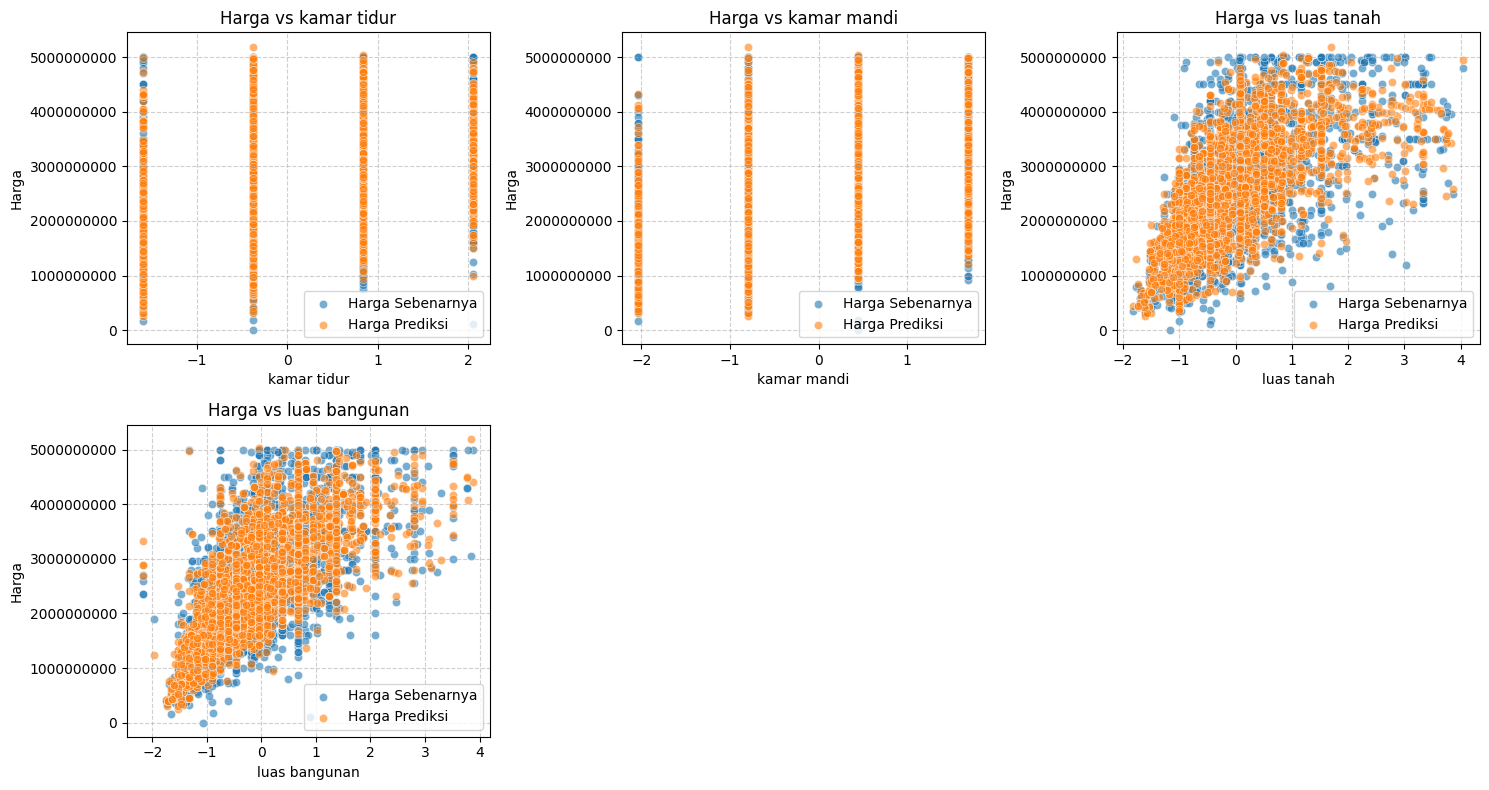

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan variabel X_test4, y_test4, dan y_pred_tuned_lgbm4 sudah tersedia dari kode sebelumnya

# Gabungkan data uji, harga sebenarnya, dan prediksi ke dalam satu DataFrame
# Ini akan mempermudah plotting
results_df = pd.DataFrame({
    'Actual_Price': y_test4,
    'Predicted_Price': y_pred_tuned_lgbm4
})

# Gabungkan fitur dari X_test4
results_df = pd.concat([results_df, X_test4], axis=1)

# Identifikasi kolom fitur yang ingin diplot (selain kolom city_encoded)
# Anda perlu mengetahui nama pasti kolom city_encoded dari DataFrame df_new4
# Asumsikan nama kolom encoded city adalah 'city_0', 'city_1', ... 'city_N'
# Anda perlu menyesuaikan daftar ini jika nama kolomnya berbeda atau jumlahnya beda
city_encoded_cols = [col for col in X_test4.columns if col.startswith('city_')]

# Dapatkan daftar kolom fitur non-city
feature_cols_to_plot = [col for col in X_test4.columns if col not in city_encoded_cols]

# Jumlah fitur yang akan diplot
num_features = len(feature_cols_to_plot)

# Tentukan ukuran grid plot
n_cols = 3 # Jumlah kolom dalam grid
n_rows = (num_features + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan

# Buat grid figure dan axes untuk plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Sesuaikan ukuran figsize
axes = axes.flatten() # Mengubah array axes menjadi 1D untuk iterasi mudah

# Iterasi melalui setiap fitur dan buat plot
for i, col in enumerate(feature_cols_to_plot):
    ax = axes[i] # Pilih axes untuk plot saat ini

    # Scatter plot harga sebenarnya vs fitur
    sns.scatterplot(x=results_df[col], y=results_df['Actual_Price'], ax=ax, label='Harga Sebenarnya', alpha=0.6)

    # Scatter plot harga prediksi vs fitur
    sns.scatterplot(x=results_df[col], y=results_df['Predicted_Price'], ax=ax, label='Harga Prediksi', alpha=0.6)

    ax.set_title(f'Harga vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Harga')
    ax.ticklabel_format(style='plain', axis='y') # Menggunakan format angka biasa di sumbu Y
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Sembunyikan axes yang tidak terpakai jika jumlah fitur tidak mengisi semua grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display # Untuk menampilkan DataFrame dengan rapi di Colab

# Pastikan variabel X_test4, y_test4, dan y_pred_tuned_lgbm4 sudah tersedia dari kode sebelumnya

# 1. Hitung perbedaan absolut (error) antara harga sebenarnya dan harga prediksi
errors = np.abs(y_test4 - y_pred_tuned_lgbm4)

# 2. Gabungkan error, harga sebenarnya, dan prediksi dengan data uji (fitur)
# Pastikan indeks cocok antara series/DataFrame yang digabungkan
error_analysis_df = pd.DataFrame({
    'Actual_Price': y_test4,
    'Predicted_Price': y_pred_tuned_lgbm4,
    'Absolute_Error': errors
})

# Gabungkan dengan fitur dari X_test4. Menggunakan join pada index
error_analysis_df = error_analysis_df.join(X_test4)

# 3. Urutkan DataFrame berdasarkan Absolute_Error dari yang terbesar ke terkecil
error_analysis_df_sorted = error_analysis_df.sort_values(by='Absolute_Error', ascending=False)

# 4. Pilih kolom yang ingin ditampilkan (kecuali kolom city_encoded)
# Identifikasi kolom city_encoded (sesuaikan jika nama kolomnya berbeda dari 'city_')
city_encoded_cols = [col for col in X_test4.columns if col.startswith('city_')]

# Dapatkan semua nama kolom dari DataFrame analisis error yang sudah diurutkan
all_cols = error_analysis_df_sorted.columns.tolist()

# Buat daftar kolom yang akan ditampilkan: semua kolom kecuali city_encoded_cols
cols_to_display = [col for col in all_cols if col not in city_encoded_cols]

# 5. Tampilkan beberapa baris teratas dari data yang memiliki error paling tinggi, hanya dengan kolom yang dipilih
print("\nRumah dengan Error Prediksi Tertinggi (Tanpa Kolom City Encoding):")
display(error_analysis_df_sorted[cols_to_display].head(20)) # Menampilkan 20 rumah dengan error tertinggi, hanya kolom yang dipilih

# Anda bisa menyesuaikan angka 20 untuk melihat lebih banyak atau lebih sedikit

# 6. Analisis Karakteristik Umum
# Setelah melihat tabel di atas, periksa fitur-fitur dari rumah-rumah dengan error tertinggi tersebut.
# Cari pola pada fitur-fitur yang tersisa (misalnya luas tanah, luas bangunan, jumlah kamar, dll.).


Rumah dengan Error Prediksi Tertinggi (Tanpa Kolom City Encoding):


,Actual_Price,Predicted_Price,Absolute_Error,kamar tidur,kamar mandi,luas tanah,luas bangunan
3044,1.700000e+09,4.989878e+09,3.289878e+09,-1.595995,-0.790975,1.161270,0.437279
15081,4.800000e+09,2.240672e+09,2.559328e+09,-1.595995,-0.790975,-0.913800,0.096298
1377,1.600000e+09,4.152116e+09,2.552116e+09,2.060185,0.451051,0.619948,2.085352
11933,1.900000e+09,4.391676e+09,2.491676e+09,-0.377268,-0.790975,2.604797,1.417599
3158,8.000000e+08,3.248025e+09,2.448025e+09,-1.595995,-2.033002,1.684549,0.494109
6597,1.100000e+08,2.463205e+09,2.353205e+09,2.060185,0.451051,-0.462697,0.891920
5793,5.000000e+09,2.696545e+09,2.303455e+09,-1.595995,-0.790975,0.511683,0.664600
16224,1.920000e+09,4.219183e+09,2.299183e+09,0.841458,0.451051,1.576284,1.616504
3382,1.600000e+09,3.837199e+09,2.237199e+09,-1.595995,-0.790975,1.197358,1.616504
11744,4.300000e+09,2.087869e+09,2.212131e+09,-1.595995,-2.033002,0.511683,-1.082926


In [ ]:
error_analysis_df_sorted.describe()

,Actual_Price,Predicted_Price,Absolute_Error,kamar tidur,kamar mandi,luas tanah,luas bangunan,city_0,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
count,2.810000e+03,2.810000e+03,2.810000e+03,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000
mean,2.529515e+09,2.550223e+09,3.698089e+08,-0.032902,-0.027195,-0.036388,-0.049801,-0.011379,-0.012910,-0.005892,0.007021,-0.005420,0.018369,0.030056,-0.000780,-0.018596
std,1.129144e+09,1.003022e+09,3.939288e+08,0.992687,0.999576,0.997536,0.969264,0.861000,0.997900,0.998841,1.001379,0.999132,1.003633,1.002001,1.000096,1.000788
min,1.790000e+06,2.537015e+08,1.117719e+05,-1.595995,-2.033002,-1.816004,-2.162698,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,-0.901021,-1.042990
25%,1.650000e+09,1.768008e+09,8.414130e+07,-0.377268,-0.790975,-0.733359,-0.756153,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,-0.901021,-1.042990
50%,2.400000e+09,2.483243e+09,2.443015e+08,-0.377268,0.451051,-0.246168,-0.187852,-0.043881,-0.844567,-0.800893,-0.840491,-0.827731,-0.821762,-0.927126,-0.901021,0.958782
75%,3.380000e+09,3.301978e+09,5.265965e+08,0.841458,0.451051,0.398908,0.550939,-0.043881,1.184039,1.248606,1.189781,1.208122,1.216898,1.078602,1.109852,0.958782
max,5.000000e+09,5.192086e+09,3.289878e+09,2.060185,1.693078,4.048324,3.889708,22.788886,1.184039,1.248606,1.189781,1.208122,1.216898,1.078602,1.109852,0.958782



Membuat Box Plot Perbandingan Distribusi Fitur (Error Tinggi vs Seluruh Data Uji)...


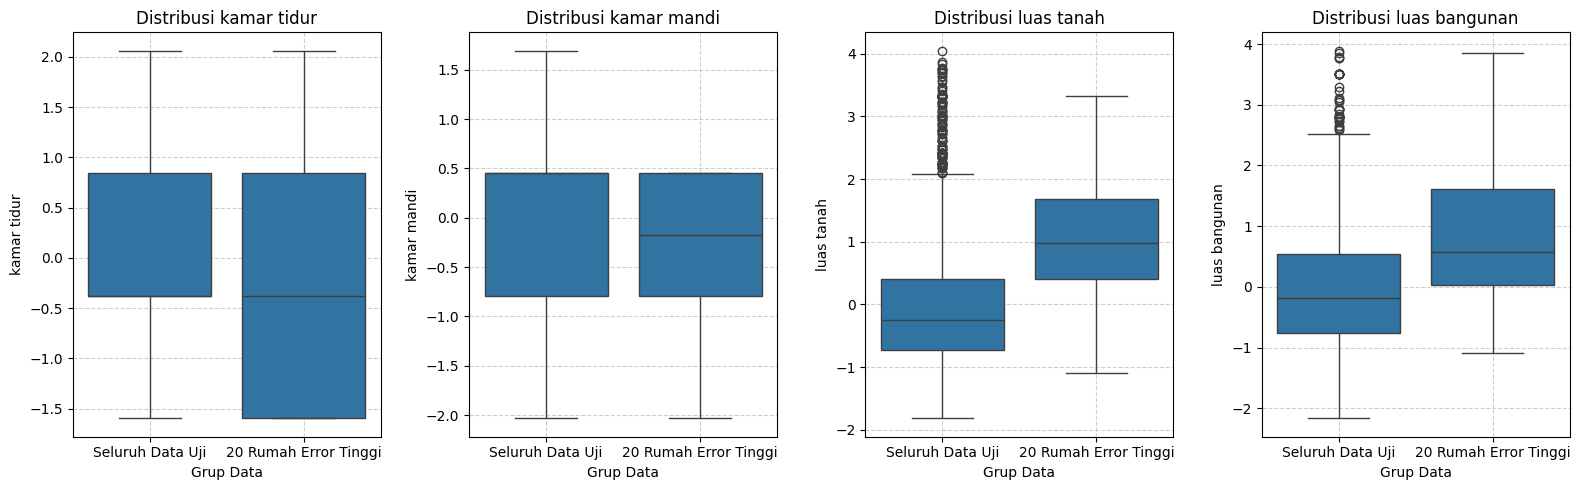

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Diperlukan untuk menghitung error absolut jika error_analysis_df_sorted belum ada

# Pastikan variabel X_test4, y_test4, dan y_pred_tuned_lgbm4 sudah tersedia dari kode sebelumnya

# === Pastikan error_analysis_df_sorted tersedia ===
# Jika Anda menjalankan kode ini secara terpisah, pastikan DataFrame error_analysis_df_sorted sudah dibuat.
# Jika belum, Anda bisa menggunakan kode berikut untuk membuatnya:
try:
    error_analysis_df_sorted.head() # Cek apakah DataFrame ini sudah ada
except NameError:
    print("DataFrame error_analysis_df_sorted tidak ditemukan, membuatnya ulang...")
    # 1. Hitung perbedaan absolut (error) antara harga sebenarnya dan harga prediksi
    errors = np.abs(y_test4 - y_pred_tuned_lgbm4)

    # 2. Gabungkan error, harga sebenarnya, dan prediksi dengan data uji (fitur)
    # Pastikan indeks cocok antara series/DataFrame yang digabungkan
    error_analysis_df = pd.DataFrame({
        'Actual_Price': y_test4,
        'Predicted_Price': y_pred_tuned_lgbm4,
        'Absolute_Error': errors
    })

    # Gabungkan dengan fitur dari X_test4. Menggunakan join pada index
    error_analysis_df = error_analysis_df.join(X_test4)

    # 3. Urutkan DataFrame berdasarkan Absolute_Error dari yang terbesar ke terkecil
    error_analysis_df_sorted = error_analysis_df.sort_values(by='Absolute_Error', ascending=False)
    print("DataFrame error_analysis_df_sorted berhasil dibuat.")
# ===============================================


# Ambil data fitur untuk 20 rumah dengan error tertinggi
# Gunakan NAMA KOLOM DENGAN SPASI sesuai dengan output X_test4.columns
top_error_features = error_analysis_df_sorted.head(20)[['kamar tidur', 'kamar mandi', 'luas tanah', 'luas bangunan']]

# Dapatkan data fitur untuk seluruh data uji
# Gunakan NAMA KOLOM DENGAN SPASI sesuai dengan output X_test4.columns
all_test_features = X_test4[['kamar tidur', 'kamar mandi', 'luas tanah', 'luas bangunan']]

# Nama-nama fitur yang akan dibandingkan (gunakan NAMA KOLOM DENGAN SPASI)
features_to_compare = ['kamar tidur', 'kamar mandi', 'luas tanah', 'luas bangunan']

# Tentukan jumlah fitur
num_features = len(features_to_compare)

# Tentukan ukuran grid figure dan axes untuk plot
# Sesuaikan figsize jika perlu
fig, axes = plt.subplots(1, num_features, figsize=(num_features * 4, 5)) # 1 baris, num_features kolom
axes = axes.flatten() # Mengubah array axes menjadi 1D

print("\nMembuat Box Plot Perbandingan Distribusi Fitur (Error Tinggi vs Seluruh Data Uji)...")

# Iterasi melalui setiap fitur dan buat box plot perbandingan
for i, col in enumerate(features_to_compare):
    ax = axes[i] # Pilih axes untuk plot saat ini

    # Gabungkan data untuk memudahkan plotting dengan seaborn
    # Membuat DataFrame sementara untuk setiap fitur
    temp_df = pd.concat([
        pd.DataFrame({col: all_test_features[col], 'Group': 'Seluruh Data Uji'}),
        pd.DataFrame({col: top_error_features[col], 'Group': '20 Rumah Error Tinggi'})
    ])

    # Buat box plot
    # Menggunakan argumen `x`, `y`, dan `data` sesuai dengan temp_df
    sns.boxplot(x='Group', y=col, data=temp_df, ax=ax)

    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel('Grup Data')
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Mengatur layout agar tidak tumpang tindih
plt.show()

# --- Kode Alternatif Menggunakan Histogram (jika Anda lebih suka) ---
# fig, axes = plt.subplots(1, num_features, figsize=(num_features * 5, 4))
# axes = axes.flatten()

# print("\nMembuat Histogram Perbandingan Distribusi Fitur (Error Tinggi vs Seluruh Data Uji)...")

# for i, col in enumerate(features_to_compare):
#     ax = axes[i]

#     sns.histplot(data=all_test_features, x=col, ax=ax, color='skyblue', label='Seluruh Data Uji', kde=True, stat='density', common_norm=False)
#     sns.histplot(data=top_error_features, x=col, ax=ax, color='lightcoral', label='20 Rumah Error Tinggi', kde=True, stat='density', common_norm=False)

#     ax.set_title(f'Distribusi {col}')
#     ax.set_xlabel(col)
#     ax.set_ylabel('Density')
#     ax.legend()
#     ax.grid(True, linestyle='--', alpha=0.6)

# plt.tight_layout()
# plt.show()

In [ ]:
# Pastikan error_analysis_df_sorted dan X_test4 sudah tersedia

# Ambil data fitur untuk 20 rumah dengan error tertinggi
top_error_features = error_analysis_df_sorted.head(20)[['kamar tidur', 'kamar mandi', 'luas tanah', 'luas bangunan']]

# Dapatkan data fitur untuk seluruh data uji
all_test_features = X_test4[['kamar tidur', 'kamar mandi', 'luas tanah', 'luas bangunan']]

print("\nStatistik Ringkasan Fitur untuk Seluruh Data Uji:")
display(all_test_features.describe())

print("\nStatistik Ringkasan Fitur untuk 20 Rumah dengan Error Tertinggi:")
display(top_error_features.describe())


Statistik Ringkasan Fitur untuk Seluruh Data Uji:


,kamar tidur,kamar mandi,luas tanah,luas bangunan
count,2810.000000,2810.000000,2810.000000,2810.000000
mean,-0.032902,-0.027195,-0.036388,-0.049801
std,0.992687,0.999576,0.997536,0.969264
min,-1.595995,-2.033002,-1.816004,-2.162698
25%,-0.377268,-0.790975,-0.733359,-0.756153
50%,-0.377268,0.451051,-0.246168,-0.187852
75%,0.841458,0.451051,0.398908,0.550939
max,2.060185,1.693078,4.048324,3.889708



Statistik Ringkasan Fitur untuk 20 Rumah dengan Error Tertinggi:


,kamar tidur,kamar mandi,luas tanah,luas bangunan
count,20.000000,20.000000,20.000000,20.000000
mean,-0.255396,-0.356266,0.972710,0.745583
std,1.179613,0.925508,1.207947,1.184821
min,-1.595995,-2.033002,-1.094240,-1.082926
25%,-1.595995,-0.790975,0.398908,0.025261
50%,-0.377268,-0.169962,0.980829,0.579354
75%,0.841458,0.451051,1.684549,1.605848
max,2.060185,0.451051,3.326560,3.847086


# Evaluasi

In [ ]:
# prompt: membuat tabel yang berisikan metrik metrik evaluasi untuk model df_new dan df_new2, jangan masukan tuned. gabungkan evaluasi  namun di belakang nama model dicantumkan df_new yang mana

# Mengumpulkan hasil evaluasi untuk model df_new dan df_new2
evaluation_results = {
    'Model': [
        'Random Forest (df_new)',
        'Gradient Boosting (df_new)',
        'XGBoost (df_new)',
        'Random Forest (df_new2)',
        'Gradient Boosting (df_new2)',
        'XGBoost (df_new2)',
    ],
    'MAE': [
        mae_rf,
        mae_gb,
        mae_xgb,
        mae_rf2,
        mae_gb2,
        mae_xgb2,
    ],
    'MSE': [
        mse_rf,
        mse_gb,
        mse_xgb,
        mse_rf2,
        mse_gb2,
        mse_xgb2,
    ],
    'RMSE': [
        rmse_rf,
        rmse_gb,
        rmse_xgb,
        rmse_rf2,
        rmse_gb2,
        rmse_xgb2,
    ],
    'R2': [
        r2_rf,
        r2_gb,
        r2_xgb,
        r2_rf2,
        r2_gb2,
        r2_xgb2,
    ]
}

# Membuat DataFrame dari hasil evaluasi
df_evaluation = pd.DataFrame(evaluation_results)

# Menampilkan tabel evaluasi
print("\nTabel Evaluasi Model (df_new vs df_new2):")
display(df_evaluation)



Tabel Evaluasi Model (df_new vs df_new2):


,Model,MAE,MSE,RMSE,R2
0,Random Forest (df_new),5.954664e+08,8.815574e+17,9.389129e+08,0.786478
1,Gradient Boosting (df_new),7.828308e+08,1.228077e+18,1.108186e+09,0.702547
2,XGBoost (df_new),7.200462e+08,1.080085e+18,1.039272e+09,0.738392
3,Random Forest (df_new2),6.028893e+08,9.083705e+17,9.530847e+08,0.779983
4,Gradient Boosting (df_new2),8.013425e+08,1.272767e+18,1.128170e+09,0.691723
5,XGBoost (df_new2),7.149191e+08,1.059398e+18,1.029271e+09,0.743403


In [ ]:
evaluation_results_filtered = {
    'Model': [
        'Random Forest (df_new3)',
        'Gradient Boosting (df_new3)',
        'XGBoost (df_new3)',
        'SVR (df_new3)',
        'CatBoost (df_new3)',
        'LightGBM (df_new3)',
        'AdaBoost (df_new3)',
        'KNN (df_new3)',
        'Random Forest (df_new4)',
        'Gradient Boosting (df_new4)',
        'XGBoost (df_new4)',
        'LightGBM (df_new4)',
    ],
    'MAE': [
        mae_rf3,
        mae_gb3,
        mae_xgb3,
        mae_svr3,
        mae_cb3,
        mae_lgbm3,
        mae_ada3,
        mae_knn3,
        mae_rf4,
        mae_gb4,
        mae_xgb4,
        mae_lgbm4,
    ],
    'MSE': [
        mse_rf3,
        mse_gb3,
        mse_xgb3,
        mse_svr3,
        mse_cb3,
        mse_lgbm3,
        mse_ada3,
        mse_knn3,
        mse_rf4,
        mse_gb4,
        mse_xgb4,
        mse_lgbm4,
    ],
    'RMSE': [
        rmse_rf3,
        rmse_gb3,
        rmse_xgb3,
        rmse_svr3,
        rmse_cb3,
        rmse_lgbm3,
        rmse_ada3,
        rmse_knn3,
        rmse_rf4,
        rmse_gb4,
        rmse_xgb4,
        rmse_lgbm4,
    ],
    'R2': [
        r2_rf3,
        r2_gb3,
        r2_xgb3,
        r2_svr3,
        r2_cb3,
        r2_lgbm3,
        r2_ada3,
        r2_knn3,
        r2_rf4,
        r2_gb4,
        r2_xgb4,
        r2_lgbm4,
    ]
}

df_evaluation_filtered = pd.DataFrame(evaluation_results_filtered)
print("\nTabel Evaluasi Model (df_new3 vs df_new4):")
display(df_evaluation_filtered)


Tabel Evaluasi Model (df_new3 vs df_new4):


,Model,MAE,MSE,RMSE,R2
0,Random Forest (df_new3),3.914094e+08,3.243402e+17,5.695088e+08,0.745518
1,Gradient Boosting (df_new3),5.014602e+08,4.323907e+17,6.575642e+08,0.660741
2,XGBoost (df_new3),4.584808e+08,3.781873e+17,6.149694e+08,0.703269
3,SVR (df_new3),4.345013e+08,3.705130e+17,6.086978e+08,0.709291
4,CatBoost (df_new3),4.317416e+08,3.386952e+17,5.819752e+08,0.734255
5,LightGBM (df_new3),4.058300e+08,3.137367e+17,5.601221e+08,0.753838
6,AdaBoost (df_new3),6.124370e+08,5.788293e+17,7.608083e+08,0.545843
7,KNN (df_new3),4.350875e+08,4.108306e+17,6.409607e+08,0.677657
8,Random Forest (df_new4),3.864238e+08,3.196684e+17,5.653922e+08,0.749184
9,Gradient Boosting (df_new4),5.041664e+08,4.381608e+17,6.619372e+08,0.656213
